In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
poll_data = pd.read_csv('../data/mlcourse_open_first_survey_parsed.csv')

In [3]:
poll_data.head(2)

,id,Timestamp,Представьтесь в 2-3 фразах,Работали ли Вы с Jupyter notebooks?,Что Вы ждете от курса?,Потом мы прямо этот же набор данных поанализируем с Pandas. Так что какой Ваш любимый вид спорта?,"Ладно, посерьезней: согласны ли Вы на обработку персональных данных?","Какие оцениваете свой уровень математической подготовки? (матан, линал, теорвер)","Чему равна дисперсия равномерного на [0,6] распределения?","Найдите минимум функции 3x^4-8x^3+6x^2-12 на отрезке [-3,3]",Сколько параметров у нормального распределения?,Сможете написать на Python генератор чисел Фибоначчи?,"Хорошо, а готовы к началу курса (6 сентября 2017) освоить азы Python? На уровне Code Academy, DataCamp или github.com/Yorko/python_intro",Оцените свой уровень владения GitHub,"Посоветуйте хороший фильм в стиле ""Игра в имитацию"" :)"
0,0,2016/12/05 10:39:59 am GMT+3,крутой Developer,Да,"Ребята, вижу ваш настрой, уверен курс будет ин...",Starcraft,Да,4,3,-12,2.0,Да,Да,Проф,"Прочитай книгу Лема ""Голос Неба"", очень много ..."
1,1,2016/12/05 10:44:27 am GMT+3,Разработчик Navision. Изучаю тему DS для возмо...,Да,"Практики, подкрепленной теорией. Хочется упоря...",NaN,Да,1,3,NaN,2.0,"Да, но фиговый.",Да,Могу скачать материалы,NaN


In [4]:
poll_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 15 columns):
 #   Column                                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                                    --------------  -----  
 0   id                                                                                                                                        2944 non-null   int64  
 1   Timestamp                                                                                                                                 2944 non-null   object 
 2   Представьтесь в 2-3 фразах                                                                                                                2944 non-null   object 
 3   Работали ли Вы с Jupyter notebooks?                  

In [5]:
poll_data.shape

(2944, 15)

In [6]:
poll_data.columns

Index(['id', 'Timestamp', 'Представьтесь в 2-3 фразах',
       'Работали ли Вы с Jupyter notebooks?', 'Что Вы ждете от курса?',
       'Потом мы прямо этот же набор данных поанализируем с Pandas. Так что какой Ваш любимый вид спорта?',
       'Ладно, посерьезней: согласны ли Вы на обработку персональных данных?',
       'Какие оцениваете свой уровень математической подготовки? (матан, линал, теорвер)',
       'Чему равна дисперсия равномерного на [0,6] распределения?',
       'Найдите минимум функции 3x^4-8x^3+6x^2-12 на отрезке [-3,3]',
       'Сколько параметров у нормального распределения?',
       'Сможете написать на Python генератор чисел Фибоначчи?',
       'Хорошо, а готовы к началу курса (6 сентября 2017) освоить азы Python? На уровне Code Academy, DataCamp или github.com/Yorko/python_intro',
       'Оцените свой уровень владения GitHub',
       'Посоветуйте хороший фильм в стиле "Игра в имитацию" :)'],
      dtype='object')

### слияние / замена заголовков

In [7]:
rename_dic = dict(zip(poll_data.columns, ['ID', 'time', 'intro', 'jupyter', 'expect', 
                        'sport', 'personal', 'math_level', 'quest1', 
                        'quest2', 'quest3', 'fib_gen', 'python', 
                        'github', 'movie']))

In [8]:
poll_data.rename(columns=rename_dic, inplace = True)

In [9]:
poll_data.head()

,ID,time,intro,jupyter,expect,sport,personal,math_level,quest1,quest2,quest3,fib_gen,python,github,movie
0,0,2016/12/05 10:39:59 am GMT+3,крутой Developer,Да,"Ребята, вижу ваш настрой, уверен курс будет ин...",Starcraft,Да,4,3,-12,2.0,Да,Да,Проф,"Прочитай книгу Лема ""Голос Неба"", очень много ..."
1,1,2016/12/05 10:44:27 am GMT+3,Разработчик Navision. Изучаю тему DS для возмо...,Да,"Практики, подкрепленной теорией. Хочется упоря...",NaN,Да,1,3,NaN,2.0,"Да, но фиговый.",Да,Могу скачать материалы,NaN
2,2,2016/12/05 10:47:07 am GMT+3,"Я Software Engeneer разработчик, активно интер...",Да,Побольше практики на реальных данных (задачах).,basketball,Да,3,3,NaN,2.0,Да,Да,Проф,NaN
3,3,2016/12/05 10:47:22 am GMT+3,Семилетний инженер. Специализируюсь в компьюте...,Да,Глубокого разбора алгоритмов и инструментов.,NaN,Да,3,0.5,-12,2.0,Да,Да,"Пользуюсь ветками, могу что-то смерджить",Король говорит
4,5,2016/12/05 10:58:34 am GMT+3,программист. pl/sql python,Да,Упорядочить знания,футбол,Да,3,3,-12,2.0,Да,уже знаю,"Пользуюсь ветками, могу что-то смерджить",NaN


In [10]:
poll_data['jupyter'].value_counts().head()

Да             2071
Нет             766
немного           7
Немного           3
Да, но мало       2
Name: jupyter, dtype: int64

In [11]:
jupyter_levels = poll_data['jupyter'].map({'Да': 1, 'Нет': 0}).fillna(2)

c:\users\asutpdks4\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


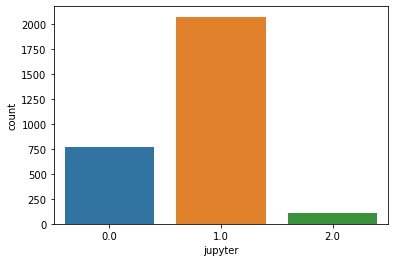

In [12]:
sns.countplot(jupyter_levels);

In [13]:
poll_data.columns

Index(['ID', 'time', 'intro', 'jupyter', 'expect', 'sport', 'personal',
       'math_level', 'quest1', 'quest2', 'quest3', 'fib_gen', 'python',
       'github', 'movie'],
      dtype='object')

In [14]:
poll_data.sport.value_counts().head()

Футбол       197
Баскетбол    113
футбол       113
Плавание      94
Хоккей        66
Name: sport, dtype: int64

In [15]:
poll_data['quest3'].unique()

array([ 2., nan,  1.,  4.,  3.])

In [16]:
(poll_data['quest3'] == 2).dropna().sum() / poll_data.dropna().shape[0]


1.3630952380952381

In [17]:
(poll_data['quest3'] == 2).dropna().sum() / poll_data['quest3'][~poll_data['quest3'].isnull()].shape[0]

0.9244036697247706

In [18]:
all_words = np.concatenate(poll_data['intro'].apply(lambda s: s.strip().split()).values)

In [19]:
len(all_words)

26533

In [20]:
import nltk

ModuleNotFoundError: No module named 'nltk'

In [ ]:
nltk.download('stopwords')

In [ ]:
len(stopwords.words('russian'))

In [ ]:
pd.Series(list(all_words)).value_counts()

In [ ]:
words_series = pd.Series(list(all_words))
words_series[~words_series.isin(
    stopwords.words('russian'))].value_counts().head(10)

In [ ]:
poll_data['intro'].apply(lambda s: s.strip().split()).values

In [ ]:
np.concatenate()